<a href="https://colab.research.google.com/github/PuroshotamSingh/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Puroshotam_Singh_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone and its selling price.**
---
###**Dataset Information**
* Number of instances: 2000
* Number of attributes: 21
---
###**Features information:**
###The dataset contains features like:

1. **Battery_power** - Total energy a battery can store in one time measured in mAh

2. **Blue** - Has bluetooth or not

3. **Clock_speed** - speed at which microprocessor executes instructions

4. **Dual_sim** - Has dual sim support or not

5. **Fc** - Front Camera mega pixels

6. **Four_g** - Has 4G or not

7. **Int_memory** - Internal Memory in Gigabytes

8. **M_dep** - Mobile Depth in cm

9. **Mobile_wt** - Weight of mobile phone

10. **N_cores** - Number of cores of processor

11. **Pc** - Primary Camera mega pixels

12. **Px_height** - Pixel Resolution Height

13. **Px_width** - Pixel Resolution Width

14. **Ram** - Random Access Memory in Mega Bytes

15. **Sc_h** - Screen Height of mobile in cm

16. **Sc_w** - Screen Width of mobile in cm

17. **Talk_time** - longest time that a single battery charge will last when you are on call

18. **Three_g** - Has 3G or not

19. **Touch_screen** - Has touch screen or not

20. **Wifi** - Has wifi or not
---
###**Target Variable :**
* **'Price_range'**: This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the price range of mobile phones.**

# **Importing libraries**

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To supress the warnings

import warnings
warnings.filterwarnings('ignore')

# **Dataset initialization**

In [2]:
# Loading dataset and creating dataframe

df = pd.read_csv('/content/drive/MyDrive/Copy of data_mobile_price_range.csv')

In [3]:
# Printing first 10 rows of our dataset

df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [4]:
# Shape of dataset

df.shape

(2000, 21)

* **Number of instances: 2000**
* **Number of attributes: 21**

In [5]:
# Let's see how many data types we have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**There are only two data types, float and integers.**

In [6]:
# Let's look at the statistical discription of all features

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**The dataset contains:**
* **Dichotomous type variables such as bluetooth, wifi, 3g, 4g, dual_sim and touch screen.** 
* **Nominal type variables such as n_cores and m_deep.**

# **EDA on features**

## **price_range**

In [7]:
# checking the unique categories of dependent variable

df['price_range'].unique()

array([1, 2, 3, 0])

* **0** is for low price

* **1** is for medium price 

* **2** is for high price and

* **3** is for very high price

In [8]:
# Value counts of each of categories of price_range.

df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

Text(0.5, 1.0, 'Count of price range')

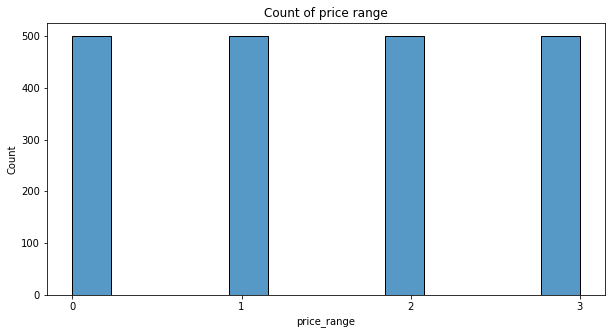

In [9]:
# Histplot to show the count of all categories

plt.figure(figsize=(10,5))
xtick=[0,1,2,3]
sns.histplot(data=df['price_range'])
plt.xticks(xtick)
plt.title('Count of price range')

**There are equal no. of observations for each price range.**

## **n_cores**

In [10]:
# Checking unique categories

sorted(list(df['n_cores'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8]

In [11]:
# Value counts of each of categories.

df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
5    246
3    246
1    242
6    230
Name: n_cores, dtype: int64

Text(0.5, 1.0, 'Count of each cores of processor')

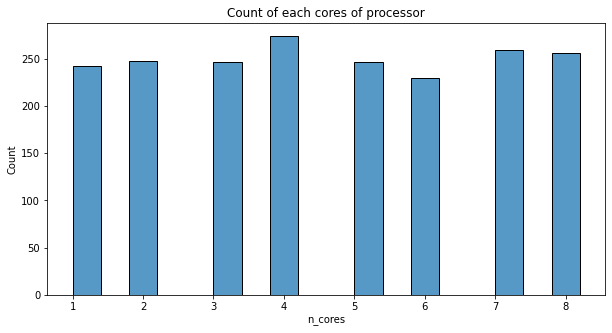

In [12]:
# Histplot to show count of each categories

plt.figure(figsize=(10,5))
sns.histplot(df['n_cores'],binwidth=0.4)
plt.title('Count of each cores of processor')

**We have almost equal no. of observations for each cores with highest observation for 4 cores.**

## **m_dep**

In [13]:
# Checking unique categories

sorted(list(df['m_dep'].unique()))

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [14]:
# Value counts of each of categories.

df['m_dep'].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

Text(0.5, 1.0, 'Count of each depth values(cm)')

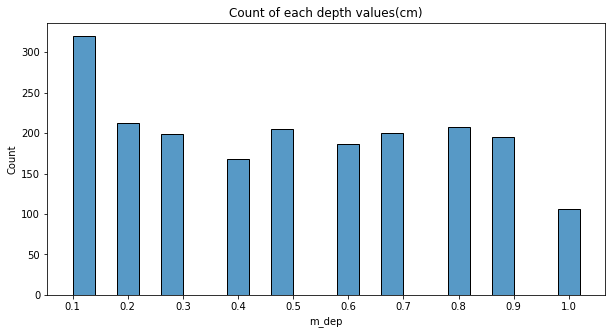

In [15]:
# Histplot to show count of each categories

plt.figure(figsize=(10,5))
xtick=sorted(list(df['m_dep'].unique()))
sns.histplot(df['m_dep'],binwidth=0.04)
plt.xticks(xtick)
plt.title('Count of each depth values(cm)')

**There is higher no. of observations for 0.1 depth and least observations for 1 cm depth.**

## **blue**

In [16]:
# Checking unique categories

df['blue'].unique()

array([0, 1])

In [17]:
# Value counts of each of categories.

df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

Text(0.5, 1.0, 'Count of phones for blue')

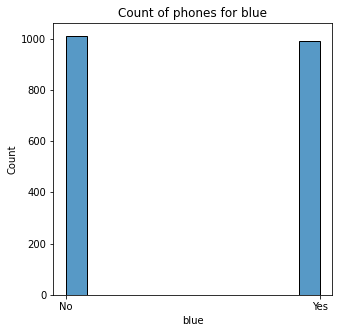

In [18]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['blue'])
plt.xticks(xtick, label)
plt.title('Count of phones for blue')

## **dual_sim**

In [19]:
# Checking unique categories

df['dual_sim'].unique()

array([0, 1])

In [20]:
# Value counts of each of categories.

df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

Text(0.5, 1.0, 'Count of phones for dual_sim')

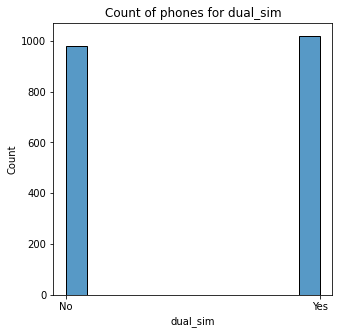

In [21]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['dual_sim'])
plt.xticks(xtick, label)
plt.title('Count of phones for dual_sim')

## **four_g**

In [22]:
# Checking unique categories

df['four_g'].unique()

array([0, 1])

In [23]:
# Value counts of each of categories.

df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

Text(0.5, 1.0, 'Count of phones for four_g')

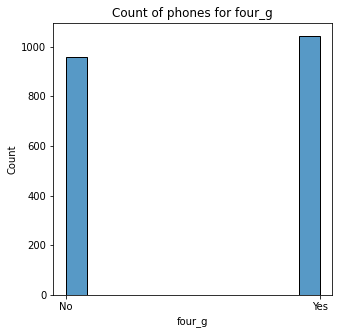

In [24]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['four_g'])
plt.xticks(xtick, label)
plt.title('Count of phones for four_g')

## **three_g**

In [25]:
# Checking unique categories

df['three_g'].unique()

array([0, 1])

In [26]:
# Value counts of each of categories.

df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

Text(0.5, 1.0, 'Count of phones for three_g')

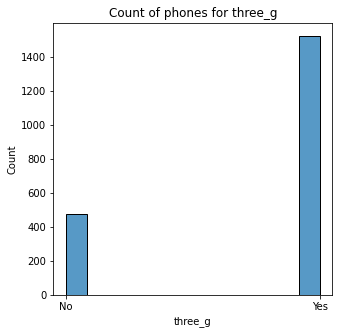

In [27]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['three_g'])
plt.xticks(xtick, label)
plt.title('Count of phones for three_g')

## **touch_screen**

In [28]:
# Checking unique categories

df['touch_screen'].unique()

array([0, 1])

In [29]:
# Value counts of each of categories.

df['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

Text(0.5, 1.0, 'Count of phones for touch_screen')

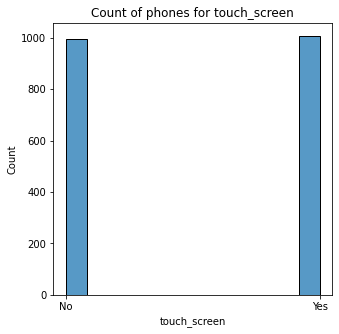

In [30]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['touch_screen'])
plt.xticks(xtick, label)
plt.title('Count of phones for touch_screen')

## **wifi**

In [31]:
# Checking unique categories

df['wifi'].unique()

array([1, 0])

In [32]:
# Value counts of each of categories.

df['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

Text(0.5, 1.0, 'Count of phones for wifi')

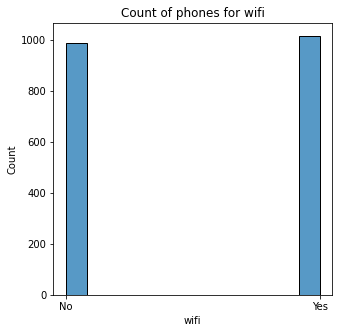

In [33]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['wifi'])
plt.xticks(xtick, label)
plt.title('Count of phones for wifi')

### **All these features have only two values i.e. '1' or '0'.**

### **Number of observation is almost equal for all these features except three_g.**

## **Correlation matrix**

Text(0.5, 1.0, 'Heatmap')

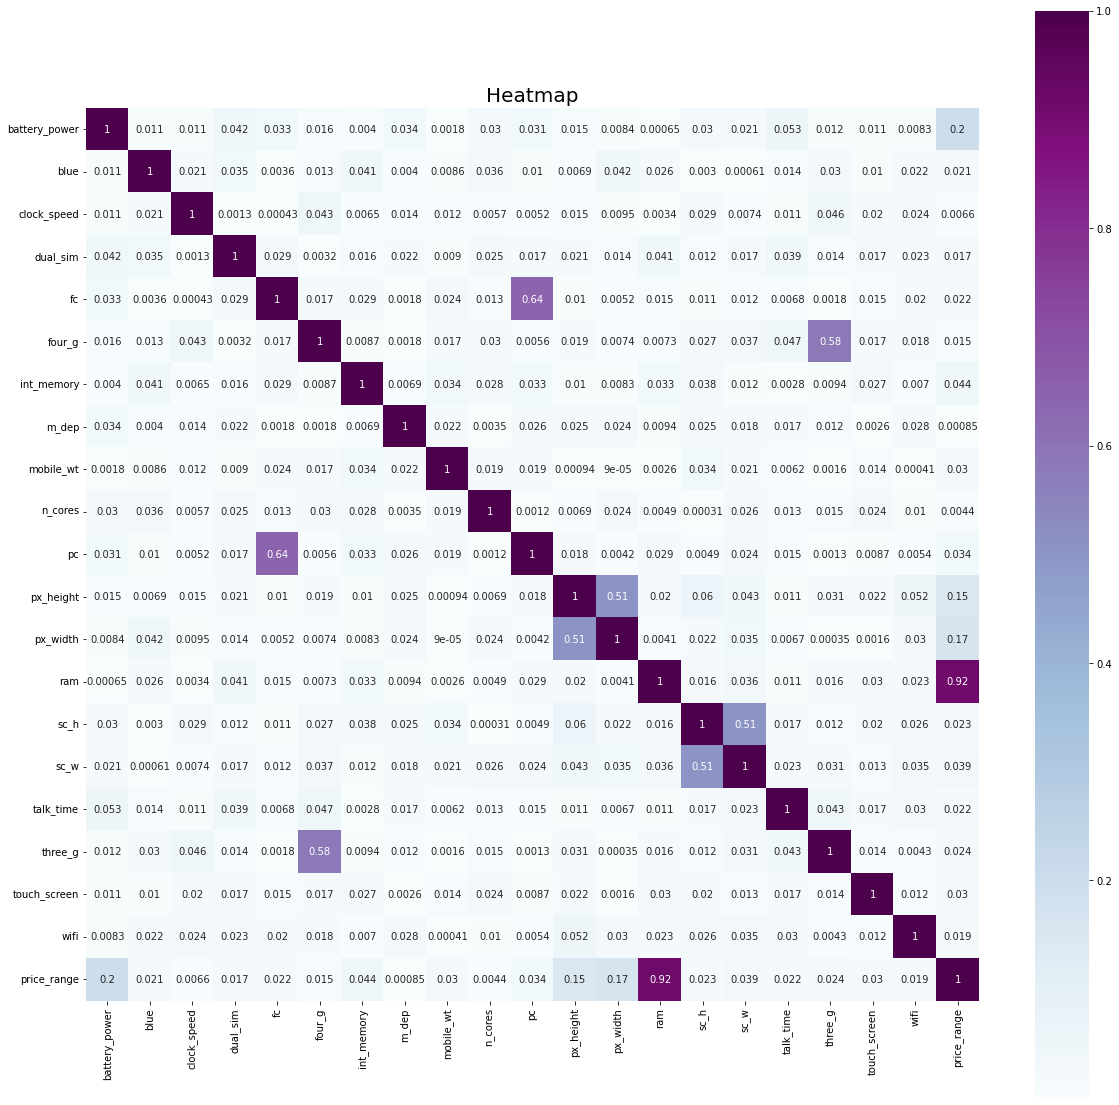

In [34]:
# Heatmap showing correlation between features

plt.figure(figsize=(20,20))
sns.heatmap(abs(df.corr()),annot=True, cmap='BuPu',square=True)
plt.title('Heatmap',fontsize=20)

* **From the above heatmap it is clear that ram is highly correlated with price_range.**
* **Also, battery_power is moderately correlated with price_range.**

## **Let's find influence of independent variables on our dependent variable**

### **Blue v/s price_range**

Text(0, 0.5, 'No. of phones')

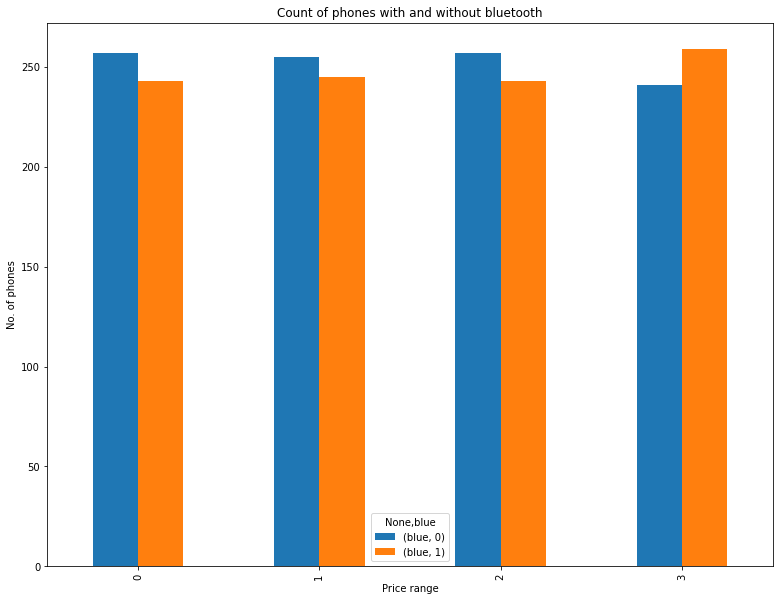

In [37]:
# Barplot showing price_range of phones with bluetooth or not.

plt.rcParams['figure.figsize']=(13,10)
df.groupby(['price_range']).agg({'blue':'value_counts'}).unstack().plot.bar()
plt.title('Count of phones with and without bluetooth')
plt.xlabel('Price range')
plt.ylabel('No. of phones')

* **All price ranges have almost equal no. of observations for both with or without bluetooth.**

### **Dual_sim v/s price_range**

Text(0, 0.5, 'No. of phones')

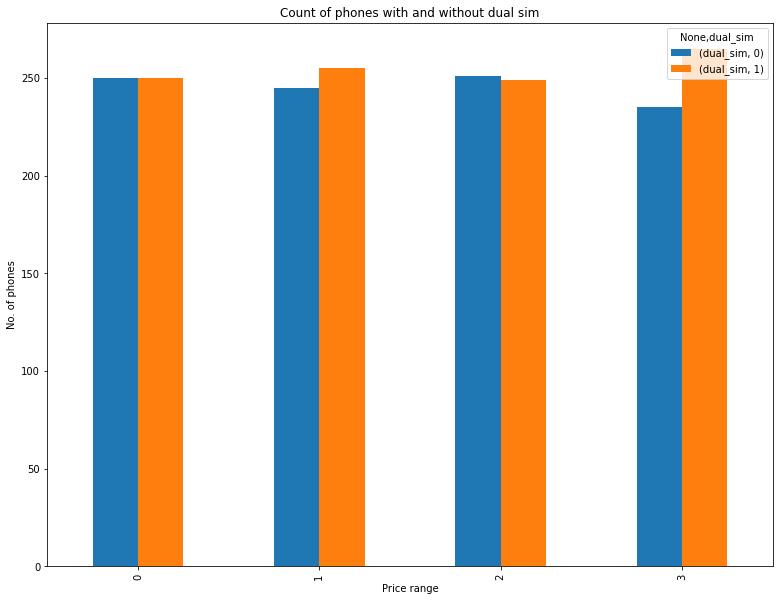

In [39]:
# Barplot showing price_range of phones with dual sim or not.

plt.rcParams['figure.figsize']=(13,10)
df.groupby(['price_range']).agg({'dual_sim':'value_counts'}).unstack().plot.bar()
plt.title('Count of phones with and without dual sim')
plt.xlabel('Price range')
plt.ylabel('No. of phones')

* **All price ranges have almost equal no. of observations for both with or without dual sim.**
* **But for very high price range, dual sim should be supported.**

### **N_cores and m_depth v/s price range**

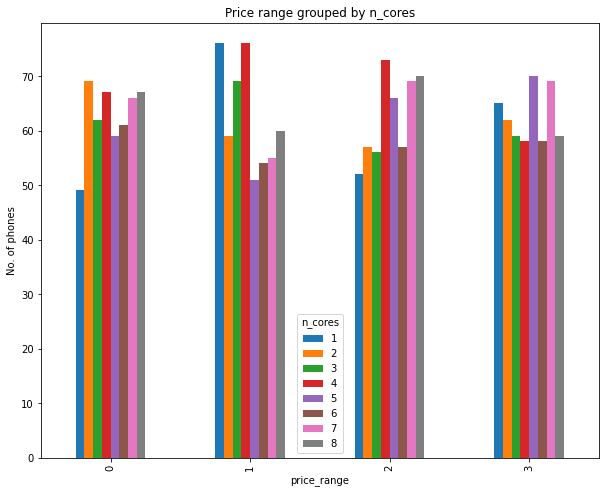

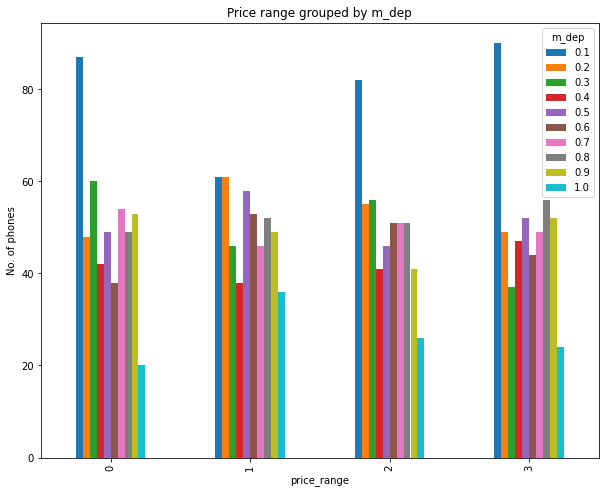

In [41]:
# grouping price range with n_cores and m_dep and visualizing 

list1=['n_cores','m_dep']
for item in list1:
  plt.rcParams['figure.figsize']=(10,8)
  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar()
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

* **Count of less n_cores is high for 0 and 1 price range.**

* **Count of high n_cores is high for 2 and 3 price range.**

* **Count of phones with less thickness is high and count of phones with high thickness is low.**

### **Battery_power v/s price_range**

Text(0.5, 1.0, 'Battery power vs price range')

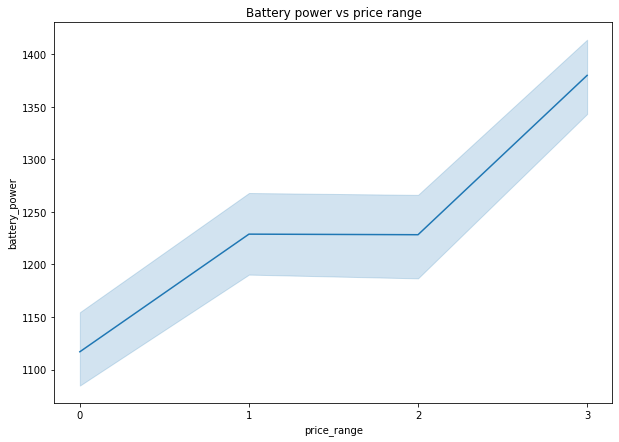

In [44]:
# Visualizing price range with battery power using lineplot

plt.figure(figsize=(10,7))
xtick=[0,1,2,3]
plt.xticks(xtick)
sns.lineplot(x='price_range',y='battery_power',data=df)
plt.title('Battery power vs price range')

* **Battery power increases as price range increases.**

### **Ram v/s price_range**

Text(0.5, 1.0, 'Ram vs price range')

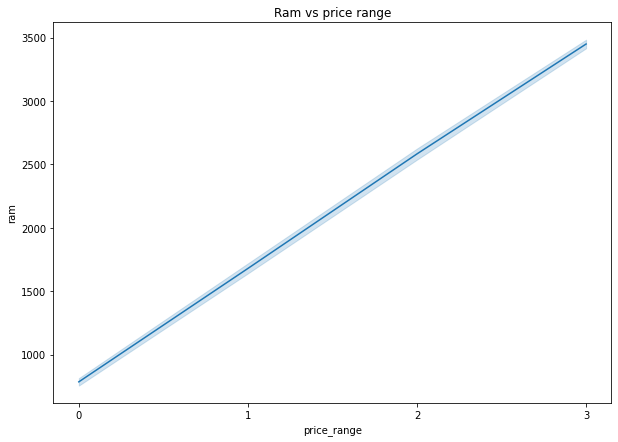

In [45]:
# Visualizing price range with ram using lineplot

plt.figure(figsize=(10,7))
xtick=[0,1,2,3]
plt.xticks(xtick)
sns.lineplot(x='price_range',y='ram',data=df)
plt.title('Ram vs price range')

* **Ram is having direct impact on price range.**
* **Higher ram is equal to higher prices.**